AISSI MED SALIM M2 IV 171731077785 ,https://github.com/sal1717lim/TAI

# TP à rendre 1 quantification et échantillonage
Dans ce TP, nous aimerions transformer une image pseudo analogique en image numérique. 
L'image à coordonnées (x,y) réelles et valeurs d'amplitude f(x,y) réelles, devra être numérisée en:
- transformant d'abord les coordonnées en entiers 
- transformant ensuite les amplitudes en entiers

L'image pseudo analogique est contenue dans le fichier de données à loader.

# 1- Importantion des librairies necessaires au travail

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Lecture des fichiers d'amplitude et coordonnées

In [2]:
outfile1 = 'lines1.npy'
outfile2 = 'Cols1.npy'
outfile3 = 'amplitude1.npy'
lines=np.load(outfile1)
cols=np.load(outfile2)
amplitude=np.load(outfile3)

# Echantillonage
L'échantillonnage consiste à prélever les valeurs d'un signal à intervalles définis, généralement réguliers. Il produit une suite de valeurs discrètes nommées échantillons. dans notre cas, j'ai voulu varier la valeur du pas pour avoirs des résolutions différente de l'image et voir l'impact de cette opération sur la qualité de l'image .j'utilise un pas 5,10, 20 et 50 .en sortie nous aurons 4 matrices de taille 200x200 100x100 50x50 et 20x20

In [3]:
#on teste avec differente valeur de  step 5,10,20 et 50
step1=5
step2=10
step3=20
step4=50
Echantillonage1=amplitude[0:amplitude.shape[0]:step1,0:amplitude.shape[1]:step1]
Echantillonage2=amplitude[0:amplitude.shape[0]:step2,0:amplitude.shape[1]:step2]
Echantillonage3=amplitude[0:amplitude.shape[0]:step3,0:amplitude.shape[1]:step3]
Echantillonage4=amplitude[0:amplitude.shape[0]:step4,0:amplitude.shape[1]:step4]
print(Echantillonage1.shape)
print(Echantillonage2.shape)
print(Echantillonage3.shape)
print(Echantillonage4.shape)

(200, 200)
(100, 100)
(50, 50)
(20, 20)


# Quantification
La quantification permet de définir le nombre de couleurs(niveau de gris possible dans l'image) selon le nombre de bits d'un pixel, plus le norme de bit est important, plus le nombre de couleurs différentes peut être utilisé.
dans un premier lieu je défie le nombre de bits à 4 pour voir l'image sur différentes résolutions, par la suite je varie le nombre de bits et j'affiche l'image pour voir les variations de nuances de gris 

In [4]:
nBits=4
# calculer le nombre de niveaux de gris
L= pow(2,nBits)
taillemax=L-1
#réaliser la quantification des 4  Echantillonage
resultat1  = np.rint(Echantillonage1*taillemax)
resultat2  = np.rint(Echantillonage2*taillemax)
resultat3  = np.rint(Echantillonage3*taillemax)
resultat4  = np.rint(Echantillonage4*taillemax)

# Afficher les resultat

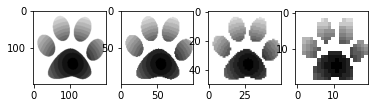

In [5]:
plt.subplot(141)
plt.imshow(resultat1,cmap='gray')
plt.subplot(142)
plt.imshow(resultat2,cmap='gray')
plt.subplot(143)
plt.imshow(resultat3,cmap='gray')
plt.subplot(144)
plt.imshow(resultat4,cmap='gray')

# NB
Après affichage des résultats, on remarque que plus le step est petit, plus la résolution de l'image est grande, et plus on a plus de Detaille sur l'image, vu que le nombre de bits et égale à 4 pour les 4 images, nous avons les mêmes nuances de gris 

In [ ]:
plt.imsave("resultat1.png", resultat1, cmap='gray')
plt.imsave("resultat2.png", resultat2, cmap='gray')
plt.imsave("resultat3.png", resultat3, cmap='gray')
plt.imsave("resultat4.png", resultat4, cmap='gray')

# Essai avec une Quantification differentes

In [7]:
nBits=1
# calculer le nombre de niveaux de gris
L= pow(2,nBits)
taillemax1=L-1
###############
nBits=2
# calculer le nombre de niveaux de gris
L= pow(2,nBits)
taillemax2=L-1
###############
nBits=3
# calculer le nombre de niveaux de gris
L= pow(2,nBits)
taillemax3=L-1
###############
nBits=8
# calculer le nombre de niveaux de gris
L= pow(2,nBits)
taillemax4=L-1
resultat1  = np.rint(Echantillonage1*taillemax1)
resultat2  = np.rint(Echantillonage1*taillemax2)
resultat3  = np.rint(Echantillonage1*taillemax3)
resultat4  = np.rint(Echantillonage1*taillemax4)

# Afficher les resultat 

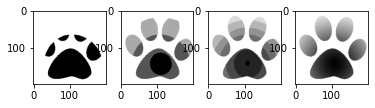

In [8]:
plt.subplot(141)
plt.imshow(resultat1,cmap='gray')
plt.subplot(142)
plt.imshow(resultat2,cmap='gray')
plt.subplot(143)
plt.imshow(resultat3,cmap='gray')
plt.subplot(144)
plt.imshow(resultat4,cmap='gray')

# NB
dans cet exemple-là, la résolution reste la même (200x200), et je fais varier le nombre de bits pour codifier la couleur, avec un nombre de bits égale à 1, on obtient une image binaire, et plus le nombre de bits est important, plus on obtient plus de nuances dans les couleurs
le dernier cas est le cas utilisé dans nos machine (8 bits)

# Lecture et affichage d'une autre image 


In [9]:
# lecture de l'image en niveau de gris
image = cv2.imread('toAdd.bmp',0)

In [10]:
# afficher avec opencv
cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.imshow('image',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Réaliser les operations sur l'image

Addition des deux images


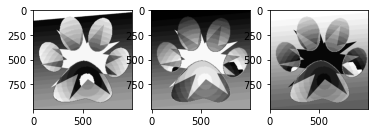

In [14]:
# additionner image et resultat
# si les deux images ne sont pas de même taille, 
# il faudra les redimensionner
# analyser les paramètres de redimensionnement
resultat=cv2.imread("resultat1.png",0)
size=(max(resultat.shape[0],image.shape[0]),max(resultat.shape[1],image.shape[1]))
resultat=cv2.resize(resultat,size)
image=cv2.resize(image,size)
add1=image+resultat
soustraction1=image-resultat
soustraction2=-soustraction1
plt.subplot(131)
plt.imshow(add1,cmap='gray')
plt.subplot(132)
plt.imshow(soustraction1,cmap='gray')
plt.subplot(133)
plt.imshow(soustraction2,cmap='gray')


# NB
en plus de l'addition, j'effectue l'opération de soustraction entre les 2 images 
la première soustraction1 et image1-image2 
la deuxième soustraction et image2-images1 qui est =-soustraction1
bien sur avant la soustraction on doit faire une redimension de nos matrices pour qu'elles soient de taille égale, j'utilise la fonction resize d'open-cv, j'ai choisi la valeur de resize comme étant la taille maximale en ligne et colonne des deux images, on aurait pu utiliser la taille d'une des deux images (200,200) par exemple (il s'agit d'un choix personnel)

Negatif de l'image

In [ ]:
# soustraire de 255 de chaque pixel 
imageN=255-image
# afficher l'image résultante
plt.imshow(imageN,cmap='gray')

# NB
open-cv nous donne la possibilité de faire la négation d'une image avec 255-images, sans créer une matrice de valeurs 255

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi à 19h

In [13]:
# bonne chance